In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth',1)
pd.set_option("display.max_columns", None)
import re
import numpy as np
import missingno as msno
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
import requests, io # for HTTP requests and I/O commands
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from tpot import TPOTRegressor

In [ ]:
df_apart_paris=pd.read_csv('df_apart_paris.csv')
df_maison_paris=pd.read_csv('df_maison_paris.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17604\1941202237.py:1: DtypeWarning: Columns (15,25,27,29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_apart_paris=pd.read_csv('df_apart_paris.csv')


In [ ]:
df_apart_paris

,Unnamed: 0,Code service sages,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/07/2017,Vente,"571110,00",16.0,NaN,RUE,8627,SAINT GILLES,75003.0,PARIS 03,75,103,NaN,AM,35,NaN,12,NaN,36.0,"49,51",NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,42.0,3.0,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/07/2017,Vente,"1578150,00",66.0,NaN,RUE,5708,DE LISBONNE,75008.0,PARIS 08,75,108,NaN,CO,44,NaN,61,"139,02",62.0,NaN,66.0,NaN,NaN,NaN,NaN,NaN,3,2.0,Appartement,NaN,135.0,4.0,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/07/2017,Vente,"2810880,00",27.0,NaN,RUE,5993,MARBEUF,75008.0,PARIS 08,75,108,NaN,AR,60,NaN,93,"219,60",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,220.0,6.0,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/07/2017,Vente,"130000,00",9.0,NaN,RUE,4718,DES INNOCENTS,75001.0,PARIS 01,75,101,NaN,AO,81,NaN,114,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,14.0,1.0,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/07/2017,Vente,"485000,00",30.0,NaN,RUE,759,BEAUBOURG,75003.0,PARIS 03,75,103,NaN,AT,78,NaN,4,"50,07",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,38.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203494,203494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,22/06/2022,Vente,"330375,00",10.0,NaN,RUE,1990,DU CHEVALERET,75013.0,PARIS 13,75,113,NaN,CI,17,NaN,22.0,NaN,37.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3,2.0,Appartement,NaN,40.0,2.0,NaN,NaN,NaN
203495,203495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,29/06/2022,Vente,"2801244,00",3.0,NaN,VLA,4983,JOCELYN,75016.0,PARIS 16,75,116,NaN,EB,7,NaN,313.0,"183,05",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,172.0,6.0,NaN,NaN,NaN
203496,203496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,14/04/2022,Adjudication,"1905000,00",88.0,NaN,AV,1277,DE BRETEUIL,75015.0,PARIS 15,75,115,NaN,CW,50,NaN,105.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,160.0,6.0,NaN,NaN,NaN
203497,203497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,21/06/2022,Vente,"423000,00",43.0,NaN,RUE,3536,DES FAVORITES,75015.0,PARIS 15,75,115,NaN,AC,55,NaN,16.0,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,43.0,2.0,NaN,NaN,NaN


In [ ]:
df_apart_paris[(df_apart_paris['No disposition']==2)]

,Unnamed: 0,Code service sages,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
29,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,17/07/2017,Vente,"840000,00",16.0,NaN,RUE,7061,DU PARC ROYAL,75003.0,PARIS 03,75,103,NaN,AM,105,NaN,613,NaN,666.0,"51,25",NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,52.0,2.0,NaN,NaN,NaN
44,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,10/07/2017,Vente,"11700000,00",51.0,NaN,AV,6450,MONTAIGNE,75008.0,PARIS 08,75,108,NaN,AQ,58,NaN,112,NaN,113.0,NaN,12.0,"431,45",NaN,NaN,NaN,NaN,3,2.0,Appartement,NaN,430.0,11.0,NaN,NaN,NaN
91,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,18/07/2017,Vente,"690000,00",10.0,NaN,RUE,9942,DE WASHINGTON,75008.0,PARIS 08,75,108,NaN,BF,6,NaN,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,72.0,3.0,NaN,NaN,NaN
149,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,26/07/2017,Vente,"413500,00",48.0,NaN,RUE,6286,MESLAY,75003.0,PARIS 03,75,103,NaN,AB,19,NaN,35,"28,30",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,28.0,2.0,NaN,NaN,NaN
160,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,25/07/2017,Vente,"6181,00",5.0,NaN,RUE,1275,DE BRETAGNE,75003.0,PARIS 03,75,103,NaN,AK,69,NaN,5,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,92.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203142,203142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,27/06/2022,Vente,"711000,00",103.0,NaN,AV,7380,PHILIPPE AUGUSTE,75011.0,PARIS 11,75,111,NaN,BS,46,NaN,137.0,NaN,309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,73.0,3.0,NaN,NaN,NaN
203197,203197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,29/06/2022,Vente,"8100000,00",6.0,NaN,PL,8622,SAINT GERMAIN DES PRES,75006.0,PARIS 06,75,106,NaN,BL,32,NaN,21.0,"112,49",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,156.0,5.0,NaN,NaN,NaN
203198,203198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,29/06/2022,Vente,"8100000,00",6.0,NaN,PL,8622,SAINT GERMAIN DES PRES,75006.0,PARIS 06,75,106,NaN,BL,32,NaN,20.0,"183,12",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,150.0,6.0,NaN,NaN,NaN
203199,203199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,29/06/2022,Vente,"8100000,00",6.0,NaN,PL,8622,SAINT GERMAIN DES PRES,75006.0,PARIS 06,75,106,NaN,BL,32,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,83.0,3.0,NaN,NaN,NaN


# Nan values and duplicates

In [ ]:
def missing_values_assessment(df):
    nan_values = df.isnull().sum().sum()
    print('Nombre d\'observations: {:,}'.format(len(df.index)))
    print('Nombre de valeurs: {:,}'.format(df.size))
    print('Valeurs manquantes: {:,}'.format(nan_values))
    print('Qualité des données: {}%'.format(100-round((nan_values/df.size)*100,2)))
    print('Type de données:\n {}%'.format(df.dtypes.value_counts()))
    analysis = {'Manquant': df.isnull().sum(),
                'Manquant %':round((df.isnull().sum()/len(df))*100, 2),
                'Type':df.dtypes
               }
    return pd.DataFrame(analysis)
missing_values_assessment(df_apart_paris).sort_values('Manquant %', ascending=False)

Nombre d'observations: 203,499
Nombre de valeurs: 8,953,956
Valeurs manquantes: 4,388,710
Qualité des données: 50.99%
Type de données:
 object     20
float64    18
int64      6 
dtype: int64%


,Manquant,Manquant %,Type
Identifiant local,203499,100.00,float64
Reference document,203499,100.00,float64
1 Articles CGI,203499,100.00,float64
2 Articles CGI,203499,100.00,float64
3 Articles CGI,203499,100.00,float64
4 Articles CGI,203499,100.00,float64
5 Articles CGI,203499,100.00,float64
No Volume,203499,100.00,float64
Code service sages,203499,100.00,float64
Prefixe de section,203499,100.00,float64


In [ ]:
df_apart_paris

,Unnamed: 0,Code service sages,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/07/2017,Vente,"571110,00",16.0,NaN,RUE,8627,SAINT GILLES,75003.0,PARIS 03,75,103,NaN,AM,35,NaN,12,NaN,36.0,"49,51",NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,42.0,3.0,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/07/2017,Vente,"1578150,00",66.0,NaN,RUE,5708,DE LISBONNE,75008.0,PARIS 08,75,108,NaN,CO,44,NaN,61,"139,02",62.0,NaN,66.0,NaN,NaN,NaN,NaN,NaN,3,2.0,Appartement,NaN,135.0,4.0,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/07/2017,Vente,"2810880,00",27.0,NaN,RUE,5993,MARBEUF,75008.0,PARIS 08,75,108,NaN,AR,60,NaN,93,"219,60",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,220.0,6.0,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/07/2017,Vente,"130000,00",9.0,NaN,RUE,4718,DES INNOCENTS,75001.0,PARIS 01,75,101,NaN,AO,81,NaN,114,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,14.0,1.0,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/07/2017,Vente,"485000,00",30.0,NaN,RUE,759,BEAUBOURG,75003.0,PARIS 03,75,103,NaN,AT,78,NaN,4,"50,07",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,38.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203494,203494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,22/06/2022,Vente,"330375,00",10.0,NaN,RUE,1990,DU CHEVALERET,75013.0,PARIS 13,75,113,NaN,CI,17,NaN,22.0,NaN,37.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3,2.0,Appartement,NaN,40.0,2.0,NaN,NaN,NaN
203495,203495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,29/06/2022,Vente,"2801244,00",3.0,NaN,VLA,4983,JOCELYN,75016.0,PARIS 16,75,116,NaN,EB,7,NaN,313.0,"183,05",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,172.0,6.0,NaN,NaN,NaN
203496,203496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,14/04/2022,Adjudication,"1905000,00",88.0,NaN,AV,1277,DE BRETEUIL,75015.0,PARIS 15,75,115,NaN,CW,50,NaN,105.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,160.0,6.0,NaN,NaN,NaN
203497,203497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,21/06/2022,Vente,"423000,00",43.0,NaN,RUE,3536,DES FAVORITES,75015.0,PARIS 15,75,115,NaN,AC,55,NaN,16.0,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,43.0,2.0,NaN,NaN,NaN


In [ ]:
df_apart_paris

,Unnamed: 0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,0,2018-1389034,2018-01-04,1,Vente,1202000.0,10.0,NaN,AV PERCIER,7250,75008.0,75108,Paris 8e Arrondissement,75,NaN,NaN,75108000CJ0003,NaN,NaN,77.0,159.20,78.0,NaN,79.0,NaN,NaN,NaN,NaN,NaN,3,2.0,Appartement,120.0,2.0,NaN,NaN,NaN,NaN,NaN,2.315005,48.874705
1,1,2018-1389035,2018-01-09,1,Vente,130000.0,20.0,NaN,RUE SAINT CLAUDE,8520,75003.0,75103,Paris 3e Arrondissement,75,NaN,NaN,75103000AL0072,NaN,NaN,206.0,NaN,213.0,NaN,214.0,NaN,216.0,NaN,NaN,NaN,4,2.0,Appartement,22.0,1.0,NaN,NaN,NaN,NaN,NaN,2.365335,48.860248
2,4,2018-1389037,2018-01-03,1,Vente,15000.0,12.0,NaN,RUE VOLTA,9905,75003.0,75103,Paris 3e Arrondissement,75,NaN,NaN,75103000AE0136,NaN,NaN,7.0,8.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,9.0,1.0,NaN,NaN,NaN,NaN,NaN,2.357140,48.864804
3,5,2018-1389038,2018-01-03,1,Vente,650000.0,174.0,NaN,BD HAUSSMANN,4485,75008.0,75108,Paris 8e Arrondissement,75,NaN,NaN,75108000BD0036,NaN,NaN,59.0,96.58,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,96.0,3.0,NaN,NaN,NaN,NaN,NaN,2.307897,48.875379
4,6,2018-1389039,2018-01-05,1,Vente,3000.0,187.0,NaN,RUE DU FAUBOURG SAINT HONORE,3518,75008.0,75108,Paris 8e Arrondissement,75,NaN,NaN,75108000AW0027,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,58.0,3.0,NaN,NaN,NaN,NaN,NaN,2.304125,48.875332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203494,356796,2017-754416,2017-12-21,1,Vente,571000.0,94.0,NaN,RUE D ABOUKIR,40,75002.0,75102,Paris 2e Arrondissement,75,NaN,NaN,75102000AN0137,NaN,NaN,24.0,71.45,6.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,3,2.0,Appartement,90.0,3.0,NaN,NaN,NaN,NaN,NaN,2.348074,48.867913
203495,356797,2017-754417,2017-12-15,1,Vente,1246493.0,14.0,NaN,RUE SAINT ANTOINE,8490,75004.0,75104,Paris 4e Arrondissement,75,NaN,NaN,75104000AO0062,NaN,NaN,43.0,90.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,80.0,4.0,NaN,NaN,NaN,NaN,NaN,2.366599,48.853697
203496,356798,2017-754418,2017-11-23,1,Vente,428700.0,9.0,NaN,RUE SAINT MERRI,8703,75004.0,75104,Paris 4e Arrondissement,75,NaN,NaN,75104000AF0057,NaN,NaN,12.0,33.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,36.0,2.0,NaN,NaN,NaN,NaN,NaN,2.353066,48.859207
203497,356803,2017-754421,2017-10-16,1,Vente,325000.0,12.0,NaN,QUAI DES CELESTINS,1636,75004.0,75104,Paris 4e Arrondissement,75,NaN,NaN,75104000AQ0069,NaN,NaN,5.0,18.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,19.0,1.0,NaN,NaN,NaN,NaN,NaN,2.361478,48.852220


In [ ]:
initial_length = len(df_apart_paris)
df_apart_paris.drop_duplicates(inplace=True)
print("deleting {} duplicates from data in {}".format(initial_length-len(df_apart_paris),df_apart_paris['Code departement'][0]))

deleting 0 duplicates from data in 75


In [ ]:
def drop_columns_rows(df):
    #drop columns with 100% for missing values 
    #drop 'Unnamed: 0','Type local','Code type local','Code departement'
    #drop'Commune' it is not needed since we have code commune column already as type int
    perc = 100.0 # Like N %
    min_count =  int(((100-perc)/100)*len(df) + 1)
    df = df.dropna( axis=1, 
                    thresh=min_count)
    df = df[df['Valeur fonciere'].notna()]
    df = df.drop(['Unnamed: 0', 'Type local','Code type local','Code departement','Commune','B/T/Q','Code voie'], axis=1)
    return df
df_apart_paris=drop_columns_rows(df_apart_paris)

In [ ]:
def clean_data(df):
    for k in df[['Valeur fonciere','1er lot','Surface Carrez du 1er lot','2eme lot','Surface Carrez du 2eme lot','3eme lot','Surface Carrez du 3eme lot','Surface Carrez du 4eme lot','Surface Carrez du 5eme lot']]: 
        df[f'{k}'] = df[f'{k}'].replace(',','.', regex=True)
        df[f'{k}'] = df[f'{k}'].replace('[a-zA-Z]+','', regex=True)

    df=df.astype({'Valeur fonciere': 'float64','1er lot':'float64',
               'Surface Carrez du 1er lot':'float64','2eme lot':'float64','Surface Carrez du 2eme lot':'float64',
               '3eme lot':'float64','Surface Carrez du 3eme lot':'float64','Surface Carrez du 4eme lot':'float64','Surface Carrez du 5eme lot':'float64'},errors='ignore')
    
    return df
df_apart_paris=clean_data(df_apart_paris)

In [ ]:
def fill_nan_values(df):    
    for k in df:
        if df[f'{k}'].dtypes=='int64' or df[f'{k}'].dtypes=='float64' :
            df[f'{k}'].fillna(0, inplace=True)
        elif df[f'{k}'].dtypes=='object':
            df[f'{k}'].fillna('', inplace=True)
    return df
df_apart_paris=fill_nan_values(df_apart_paris)

In [ ]:
df_apart_paris

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Voie,Code postal,Code commune,Section,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,1,04/07/2017,Vente,571110.0,16.0,RUE,SAINT GILLES,75003.0,103,AM,35,12.0,0.00,36.0,49.51,0.0,0.0,0.0,0.0,0.0,0.0,2,42.0,3.0,,,0.0
1,1,04/07/2017,Vente,1578150.0,66.0,RUE,DE LISBONNE,75008.0,108,CO,44,61.0,139.02,62.0,0.00,66.0,0.0,0.0,0.0,0.0,0.0,3,135.0,4.0,,,0.0
2,1,05/07/2017,Vente,2810880.0,27.0,RUE,MARBEUF,75008.0,108,AR,60,93.0,219.60,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,220.0,6.0,,,0.0
3,1,03/07/2017,Vente,130000.0,9.0,RUE,DES INNOCENTS,75001.0,101,AO,81,114.0,0.00,19.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2,14.0,1.0,,,0.0
4,1,05/07/2017,Vente,485000.0,30.0,RUE,BEAUBOURG,75003.0,103,AT,78,4.0,50.07,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,38.0,3.0,,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203494,1,22/06/2022,Vente,330375.0,10.0,RUE,DU CHEVALERET,75013.0,113,CI,17,22.0,0.00,37.0,0.00,4.0,0.0,0.0,0.0,0.0,0.0,3,40.0,2.0,,,0.0
203495,1,29/06/2022,Vente,2801244.0,3.0,VLA,JOCELYN,75016.0,116,EB,7,313.0,183.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,172.0,6.0,,,0.0
203496,1,14/04/2022,Adjudication,1905000.0,88.0,AV,DE BRETEUIL,75015.0,115,CW,50,105.0,0.00,129.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2,160.0,6.0,,,0.0
203497,1,21/06/2022,Vente,423000.0,43.0,RUE,DES FAVORITES,75015.0,115,AC,55,16.0,0.00,48.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2,43.0,2.0,,,0.0


# time serie column

In [ ]:
#sort data and drop duplicate
df_apart_paris['Date mutation'] = pd.to_datetime(df_apart_paris['Date mutation'], format = '%d/%m/%Y', errors = 'raise')
df_apart_paris = df_apart_paris.sort_values(by='Date mutation', ignore_index=True)

array([[<AxesSubplot:title={'center':'Date mutation'}>]], dtype=object)

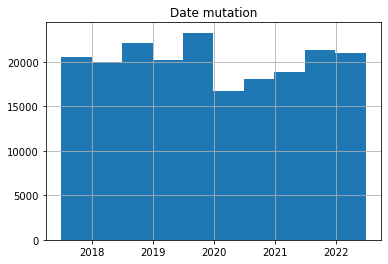

In [ ]:
df_apart_paris.hist(column='Date mutation')

COVID-19 pandemic in France (from we)

The virus was confirmed to have reached France on 24 January 2020
4–14 March 2020 : First bans on gatherings
17 March 2020 – 10 May 2020: First national lockdown
11 May 2020 – 1 June 2020: Progressive lifting of lockdown restrictions
20 July 2020 – 16 October 2020: Extension of mask-wearing rules
17 October 2020 – 14 December 2020: Introduction of curfews and second national lockdown
26 February 2021 – 2 May 2021: Third set of regional and national lockdowns relating to Alpha variant

this explain the distribution of our house data from january2020 till juin 2021
it gets better 


amel's idea was to add a column season will have values 1/2/3/4 and then apply the inflation rate without using the date time column
**inflation rate** is calculated by a very resourceful team of  engs, using it will will be like using their machine learning model 
and fine tune it with our housing data 
the problem in this case is when we do it the machine learning model will get data point like [200 m^2,5rooms,paris,2017]and a nother data point that is similar [~é200 m^2,~5rooms,~paris,2021], this two points will have dfr prices but since the model doesnt get the date it will be intrepreted as the same time and it can even be noisy to the model.
to fix that we should rescale our data ex: the house price in 2017 should be multiplied by each inflation rate until it is in the same scale as the data from 2021 and then when we give the final prediction we apply the 2022 inflation rate

**this methode is the best in term of business**but looks riskey

**ps:random forest will give perfect predictions**

**the covid problem will be fixed in this case**
_____________________________________________________________________________________________________________________________

**2nd idea** not using the inflation rate:
first step: calculate the new date column in the way that the first sold house'2017-07-04' is 0 days(so we will have column of days number) this can be captured by two ways:
__1/ randomforest/xgboost:__ in this case we have to split the data in the way that the validation data is the data from the last year this way the model will be forced updates its weight by the influence of the price raise during time
**ps: we can get the split by setting shuffle to false**
xgboost/randomforest?(banchmarket it!)

even though this model wont be able to capture the linear pattern between columns such us number of lots or surface or number of days and the price as if a linear model would do 

__2/ linear model:__
linear model would do perfectly with the previous columns but in a very terrible way with the other columns related to location
*no need to do any specific split

__3\combine linear model with xgboost or randomforest :__
in this case we will capture all the patterns, no need for any split

__4\using tpot__ the new library



__so for feature eng we need to creat column :__

**column year, month (to be able to filter the data)

**season(autumn,winter,spring,summer)

**price_ajusted(we take the prices and scale them by the inflations rates)


**date(date de mutation-date de mutation[0] in secondes


In [ ]:
def creat_coulmn(df):
    df['year'] = df['Date mutation'].dt.year
    df['month'] = df['Date mutation'].dt.month
    df['converted_seconds'] = df['Date mutation'] - df['Date mutation'][0]
    df['converted_seconds']=df['converted_seconds'].dt.total_seconds()
    return df
#season column
def find_season(month):
    season_month_north = {
            12:'T4', 1:'T1', 2:'T1',
            3:'T1', 4:'T2', 5:'T2',
            6:'T2', 7:'T3', 8:'T3',
            9:'T3', 10:'T4', 11:'T4'}
    return season_month_north.get(month)
def get_season(df):
    season_list = []
    for month in df['month']:
        season = find_season(month)
        season_list.append(season)
    df['Season'] = season_list
    return df
    
    
df_apart_paris=creat_coulmn(df_apart_paris)
df_apart_paris=get_season(df_apart_paris)

In [ ]:
df_apart_paris.groupby(['year','Season']).mean()
#in this case we will have a problem of the inflation rate
#as we see in the data the inflation rate in the year 2022 is 5.6% and that is because of the war but in the prices

No disposition  Valeur fonciere    No voie   Code postal  \
year Season                                                             
2017 T3      1.010687        9.022340e+05     47.659349  75013.389563   
     T4      1.006288        2.852439e+06     46.902830  75013.386913   
2018 T1      1.012477        2.669836e+06     48.430108  75013.561067   
     T2      1.015771        2.074572e+06     50.308074  75005.727435   
     T3      1.008013        1.877623e+07     48.256505  75013.220871   
     T4      1.018961        3.102031e+06     49.874026  75013.423290   
2019 T1      1.007513        8.839615e+05     48.409252  75013.241387   
     T2      1.004087        1.742100e+06     55.488063  75006.302833   
     T3      1.008112        1.443232e+06     52.817169  75013.305402   
     T4      1.006905        7.328993e+06     50.993497  75013.146849   
2020 T1      1.010151        1.232529e+06     50.239598  75013.232683   
     T2      1.008805        1.669868e+06     47.467305  75013.207562   
     T3      1.008286        1.253729e+06     47.551915  75013.377652   
     T4      1.009474        2.609671e+06     48.245338  75012.987933   
2021 T1      1.011718        1.311719e+06     47.064391  75013.394767   
     T2      1.005433        1.196722e+06     52.958218  75013.337317   
     T3      1.004264        1.374930e+06     47.038191  75006.261958   
     T4      1.011291        2.122396e+06     49.696710  75013.097820   
2022 T1      1.005287        1.809253e+06     48.589717  75013.168653   
     T2      1.006792        1.485069e+06     47.526095  75013.339500   

             Code commune    No plan     1er lot  Surface Carrez du 1er lot  \
year Season                                                                   
2017 T3      113.389563    48.616984  190.135760  32.578795                   
     T4      113.386913    50.576243  169.957752  29.030777                   
2018 T1      113.561067    49.556705  144.490972  27.193957                   
     T2      113.167923    50.696290  146.303511  30.103628                   
     T3      113.220871    49.812406  153.055807  27.911445                   
     T4      113.423290    49.622424  162.487706  25.285564                   
2019 T1      113.241387    50.935065  151.561125  29.327356                   
     T2      113.271249    48.448212  154.648212  26.961984                   
     T3      113.305402    49.084150  140.215190  27.910383                   
     T4      113.146849    48.985147  120.485508  24.448047                   
2020 T1      113.232683    50.126938  124.003346  26.710528                   
     T2      113.207562    49.379386  156.303250  28.555476                   
     T3      113.377652    49.859887  124.659259  26.526989                   
     T4      112.987933    51.942755  136.523387  26.445638                   
2021 T1      113.394767    49.564505  137.804664  26.574871                   
     T2      113.337317    50.422560  145.962959  28.024647                   
     T3      113.214776    49.827308  127.958658  27.552080                   
     T4      113.097820    51.487541  137.896535  25.589531                   
2022 T1      113.168653    49.803151  148.363429  28.590160                   
     T2      113.339500    50.989276  134.434853  28.189450                   

               2eme lot  Surface Carrez du 2eme lot   3eme lot  \
year Season                                                      
2017 T3      145.629598  11.404723                   8.826786    
     T4      131.268029  9.522433                    13.407153   
2018 T1      112.658754  9.094287                    12.252587   
     T2      122.361535  10.016620                   8.190934    
     T3      112.258013  10.068413                   5.641120    
     T4      114.652381  8.373062                    16.748398   
2019 T1      109.267039  9.674889                    7.039068    
     T2      107.157455  9.160512                    8.900604    
     T3

__1st method: inflation rate__

Les indices notaires-Insee font l’objet d’une publication trimestrielle de type Informations rapides environ 2 mois après la fin du trimestre. Les données au niveau France, France métropolitaine et province font l’objet d’une mise à jour environ 3 mois après la fin du trimestre (1 mois après la publication). Les séries de province détaillées sont disponibles uniquement à partir de cette actualisation.

https://www.insee.fr/fr/statistiques/6665809#tableau-ipla-g1-fr
![image-5.png](attachment:image-5.png)

In [ ]:
#rescale the prices column to the prices in third term 2022
def rescale_price(df):
    df['Valeur_fonciere_scaled']=np.nan
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T3')&(df['year']==2017), df['Valeur fonciere']*1.256580117, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T4')&(df['year']==2017), df['Valeur fonciere']*1.2410327, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T1')&(df['year']==2018), df['Valeur fonciere']*1.22989, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T2')&(df['year']==2018), df['Valeur fonciere']*1.2233757, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T3')&(df['year']==2018), df['Valeur fonciere']*1.21526, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T4')&(df['year']==2018), df['Valeur fonciere']*1.200225, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T1')&(df['year']==2019), df['Valeur fonciere']*1.1848, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T2')&(df['year']==2019), df['Valeur fonciere']*1.17293, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T3')&(df['year']==2019), df['Valeur fonciere']*1.168520418, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T4')&(df['year']==2019), df['Valeur fonciere']*1.13981, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T1')&(df['year']==2020), df['Valeur fonciere']*1.1136017, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T2')&(df['year']==2020), df['Valeur fonciere']*1.096205, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T3')&(df['year']==2020), df['Valeur fonciere']*1.096173, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T4')&(df['year']==2020), df['Valeur fonciere']*1.071254, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T1')&(df['year']==2021), df['Valeur fonciere']*1.059564, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T2')&(df['year']==2021), df['Valeur fonciere']*1.045, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T3')&(df['year']==2021), df['Valeur fonciere']*1.041, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T4')&(df['year']==2021), df['Valeur fonciere']*1.02414, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T1')&(df['year']==2022), df['Valeur fonciere']*1.012, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T2')&(df['year']==2022), df['Valeur fonciere'], inplace=True)
    return df

In [ ]:
df_apart_paris=rescale_price(df_apart_paris)

In [ ]:
df_apart_paris

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Voie,Code postal,Code commune,Section,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,year,month,converted_seconds,Season,Valeur_fonciere_scaled
0,1,2017-07-01,Vente,351788.0,69.0,RUE,NOLLET,75017.0,117,CP,82,21.0,35.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,35.0,2.0,,,0.0,2017,7,0.0,T3,4.420498e+05
1,1,2017-07-01,Vente,2010000.0,10.0,RUE,SAINT MERRI,75004.0,104,AG,113,8.0,145.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,120.0,4.0,,,0.0,2017,7,0.0,T3,2.525726e+06
2,1,2017-07-01,Vente,190000.0,40.0,RUE,SAINT SEBASTIEN,75011.0,111,BD,39,29.0,25.42,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,37.0,1.0,,,0.0,2017,7,0.0,T3,2.387502e+05
3,1,2017-07-01,Vente,667000.0,93.0,AV,EMILE ZOLA,75015.0,115,DV,82,188.0,0.00,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,68.0,3.0,,,0.0,2017,7,0.0,T3,8.381389e+05
4,1,2017-07-02,Vente,325000.0,56.0,AV,EMILE ZOLA,75015.0,115,GH,4,318.0,0.00,413.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,47.0,1.0,,,0.0,2017,7,86400.0,T3,4.083885e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201905,1,2022-06-30,Vente,374000.0,191.0,RUE,D ALESIA,75014.0,114,CV,26,47.0,34.38,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,32.0,1.0,,,0.0,2022,6,157680000.0,T2,3.740000e+05
201906,1,2022-06-30,Vente,769200.0,151.0,AV,DE CHOISY,75013.0,113,DY,9,12.0,78.36,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,90.0,4.0,,,0.0,2022,6,157680000.0,T2,7.692000e+05
201907,1,2022-06-30,Vente,1090000.0,6.0,RUE,FRIANT,75014.0,114,CH,47,15.0,100.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,109.0,4.0,,,0.0,2022,6,157680000.0,T2,1.090000e+06
201908,1,2022-06-30,Vente,25500000.0,3.0,RUE,TRONCHET,75008.0,108,BS,112,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,48.0,1.0,S,,378.0,2022,6,157680000.0,T2,2.550000e+07


# Business Rules

In [ ]:
def Business_Rules(df):
    #creat new column price/m^2
    df['price_in_m_2']=df['Valeur fonciere'].div(df['Surface reelle bati'].values)
    #Supprimer lestransactions des biensayant une superficieinférieure à 9 m²
    df=df[(df['Surface reelle bati']>=9)]
    #Supprimer lestransactions «symboliques » avec unprix du m² 
    #inférieureau prix du m² minimalsur Tremplinprix m² min Tremplin ~16 euro (T3 2019)
    df=df[(df['price_in_m_2']>=16)]
    #Supprimer lestransactions des biens“prestigieux”
    #: avec unprix du m² supérieur auprix du m² max surTremplinprix m² max Tremplin ~29 752 euro (T3 2017)
    df=df[(df['price_in_m_2']<=29752)]
    df=df[(df['No disposition']==1)]
    return df
df_apart_paris=Business_Rules(df_apart_paris)

In [ ]:
df_apart_paris.groupby(['year','Season']).mean()

No disposition  Valeur fonciere    No voie   Code postal  \
year Season                                                             
2017 T3      1.0             527295.760002    48.547624  75013.519678   
     T4      1.0             519346.208981    48.375503  75013.415959   
2018 T1      1.0             510035.744526    47.035017  75013.529300   
     T2      1.0             545870.789550    50.196652  75004.948549   
     T3      1.0             550978.870417    48.662960  75013.329555   
     T4      1.0             548988.677983    47.300362  75013.291959   
2019 T1      1.0             550236.503789    48.062435  75013.345419   
     T2      1.0             561136.034952    49.609930  75005.004822   
     T3      1.0             556477.445340    54.838580  75013.372168   
     T4      1.0             579417.729673    47.025229  75013.408153   
2020 T1      1.0             583017.221280    50.736152  75013.442633   
     T2      1.0             622721.776756    48.346978  75013.353480   
     T3      1.0             585344.564676    48.837961  75013.499359   
     T4      1.0             590779.890972    49.308564  75013.349012   
2021 T1      1.0             579302.186318    48.022835  75013.501722   
     T2      1.0             608508.905324    51.188058  75013.364768   
     T3      1.0             622860.130112    47.600963  75005.535258   
     T4      1.0             599152.483878    48.511686  75013.214772   
2022 T1      1.0             606700.788617    48.991789  75013.303109   
     T2      1.0             634271.951159    48.245910  75013.318768   

             Code commune    No plan     1er lot  Surface Carrez du 1er lot  \
year Season                                                                   
2017 T3      113.519678    49.290454  200.638999  32.626918                   
     T4      113.415959    51.497541  161.790232  31.874462                   
2018 T1      113.529300    49.563602  159.902930  31.002296                   
     T2      113.320759    50.138393  160.320312  32.664248                   
     T3      113.329555    49.799508  169.408576  31.034195                   
     T4      113.291959    50.900872  169.520634  29.456106                   
2019 T1      113.345419    50.560987  155.619020  30.781771                   
     T2      113.226545    50.354121  177.358943  30.300369                   
     T3      113.372168    48.039402  153.965109  30.244891                   
     T4      113.408153    50.056193  150.509383  30.524731                   
2020 T1      113.442633    49.934547  137.308162  28.950795                   
     T2      113.353480    49.889464  175.102261  31.329121                   
     T3      113.499359    50.329916  137.087000  29.150609                   
     T4      113.349012    50.299434  150.753265  28.743088                   
2021 T1      113.501722    49.183059  149.385253  28.510742                   
     T2      113.364768    50.173626  158.627630  30.190142                   
     T3      113.382821    49.923729  140.876543  29.522583                   
     T4      113.214772    50.140799  152.300204  28.532958                   
2022 T1      113.303109    49.313783  162.842346  31.021581                   
     T2      113.318768    50.224571  146.972869  30.658307                   

               2eme lot  Surface Carrez du 2eme lot   3eme lot  \
year Season                                                      
2017 T3      153.995185  12.111107                   8.538623    
     T4      128.287439  10.652922                   8.550961    
2018 T1      127.844688  10.567043                   14.246665   
     T2      136.368638  11.061741                   8.680804    
     T3      125.317900  11.227780                   6.132378    
     T4      122.868007  10.033852                   9.283769    
2019 T1      115.514421  10.271815                   7.150122    
     T2      124.068281  10.559415                   9.724463    
     T3

# ecode categorical columns:

In [ ]:
def encode_ctg(df):
    categorical_features_not_encoded=['Nature mutation','No voie','Type de voie','Voie','Section','Nature culture','Nature culture speciale','Season']
    #5,392,25,3388,185,2,1,4
    enc = OrdinalEncoder()
    for k in categorical_features_not_encoded:
        df_apart_paris[[f'{k}']]=enc.fit_transform(df_apart_paris[[f'{k}']])
    return df
    
df_apart_paris=encode_ctg(df_apart_paris)

In [ ]:
df_apart_paris.dtypes

No disposition                int64         
Date mutation                 datetime64[ns]
Nature mutation               float64       
Valeur fonciere               float64       
No voie                       float64       
Type de voie                  float64       
Voie                          float64       
Code postal                   float64       
Code commune                  int64         
Section                       float64       
No plan                       int64         
1er lot                       float64       
Surface Carrez du 1er lot     float64       
2eme lot                      float64       
Surface Carrez du 2eme lot    float64       
3eme lot                      float64       
Surface Carrez du 3eme lot    float64       
4eme lot                      float64       
Surface Carrez du 4eme lot    float64       
5eme lot                      float64       
Surface Carrez du 5eme lot    float64       
Nombre de lots                int64         
Surface re

In [ ]:
#df_apart_paris.to_csv("df_apart_paris_final.csv") 

In [ ]:
df_apart_paris

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Voie,Code postal,Code commune,Section,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,year,month,converted_seconds,Season,Valeur_fonciere_scaled,price_in_m_2
0,1,2017-07-01,3.0,351788.0,69.0,19.0,2745.0,75017.0,117,67.0,82,21.0,35.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,35.0,2.0,0.0,0.0,0.0,2017,7,0.0,2.0,4.420498e+05,10051.085714
1,1,2017-07-01,3.0,2010000.0,10.0,19.0,3091.0,75004.0,104,6.0,113,8.0,145.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,120.0,4.0,0.0,0.0,0.0,2017,7,0.0,2.0,2.525726e+06,16750.000000
2,1,2017-07-01,3.0,190000.0,40.0,19.0,3104.0,75011.0,111,29.0,39,29.0,25.42,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2,37.0,1.0,0.0,0.0,0.0,2017,7,0.0,2.0,2.387502e+05,5135.135135
3,1,2017-07-01,3.0,667000.0,93.0,2.0,1904.0,75015.0,115,99.0,82,188.0,0.00,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2,68.0,3.0,0.0,0.0,0.0,2017,7,0.0,2.0,8.381389e+05,9808.823529
4,1,2017-07-02,3.0,325000.0,56.0,2.0,1904.0,75015.0,115,154.0,4,318.0,0.00,413.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2,47.0,1.0,0.0,0.0,0.0,2017,7,86400.0,2.0,4.083885e+05,6914.893617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201904,1,2022-06-30,3.0,1386900.0,13.0,19.0,3263.0,75011.0,111,71.0,55,104.0,0.00,106.0,0.0,108.0,0.0,234.0,0.0,76.0,125.85,7,130.0,5.0,0.0,0.0,0.0,2022,6,157680000.0,1.0,1.386900e+06,10668.461538
201905,1,2022-06-30,3.0,374000.0,191.0,19.0,529.0,75014.0,114,73.0,26,47.0,34.38,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2,32.0,1.0,0.0,0.0,0.0,2022,6,157680000.0,1.0,3.740000e+05,11687.500000
201906,1,2022-06-30,3.0,769200.0,151.0,2.0,706.0,75013.0,113,102.0,9,12.0,78.36,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2,90.0,4.0,0.0,0.0,0.0,2022,6,157680000.0,1.0,7.692000e+05,8546.666667
201907,1,2022-06-30,3.0,1090000.0,6.0,19.0,2031.0,75014.0,114,59.0,47,15.0,100.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,109.0,4.0,0.0,0.0,0.0,2022,6,157680000.0,1.0,1.090000e+06,10000.000000


# Machine learning

__1st methode: inflation rate__ 

In [ ]:
# Splitting the dataset into training and testing set (80/20)
X, X_test, y, y_test = train_test_split(df_apart_paris.drop(['Date mutation','year','month','converted_seconds','Valeur fonciere','price_in_m_2'], axis=1), df_apart_paris['Valeur_fonciere_scaled'], test_size = 0.1, random_state = 28)
# Splitting the dataset into training and testing set (80/20)
X_train, X_valid, y_train, y_validation = train_test_split(X,y, test_size = 0.2, random_state = 28)

In [ ]:
#random forest

# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators=20, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train) 

# Predicting the target values of the test set
y_pred = model.predict(X_test)
#scoring
score = r2_score(y_test, y_pred)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
explained_variance_scor=explained_variance_score(y_test, y_pred)
max_err=max_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
print("RMSE:",rmse)
print("score: ",score)
print("explained_variance_scor: ",explained_variance_scor)
print("mae:",mae)
print("the maximum error is:",max_err)


RMSE: 1939.791
score:  0.9999904259055447
explained_variance_scor:  0.9999904262606276
mae: 71.94570305132531
the maximum error is: 229749.91705000028


In [ ]:
#xgboost
reg = XGBRegressor(n_estimators=700, learning_rate=0.01)
reg.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_valid, y_validation)])

[0]	validation_0-rmse:896416.77948	validation_1-rmse:907529.21517
[1]	validation_0-rmse:887514.31920	validation_1-rmse:898460.95979
[2]	validation_0-rmse:878700.90117	validation_1-rmse:889487.06099
[3]	validation_0-rmse:869975.37718	validation_1-rmse:880617.10985
[4]	validation_0-rmse:861336.18464	validation_1-rmse:871843.91954
[5]	validation_0-rmse:852783.60614	validation_1-rmse:863154.67550
[6]	validation_0-rmse:844315.98339	validation_1-rmse:854557.32142
[7]	validation_0-rmse:835932.98809	validation_1-rmse:846044.07351
[8]	validation_0-rmse:827632.51947	validation_1-rmse:837623.95331
[9]	validation_0-rmse:819415.67093	validation_1-rmse:829279.78210
[10]	validation_0-rmse:811280.74317	validation_1-rmse:821014.02827
[11]	validation_0-rmse:803225.76606	validation_1-rmse:812830.28666
[12]	validation_0-rmse:795251.58370	validation_1-rmse:804696.87192
[13]	validation_0-rmse:787354.80715	validation_1-rmse:796685.42718
[14]	validation_0-rmse:779538.36114	validation_1-rmse:788721.81251
[15]	

[123]	validation_0-rmse:263368.30661	validation_1-rmse:265028.21289
[124]	validation_0-rmse:260767.22999	validation_1-rmse:262393.04872
[125]	validation_0-rmse:258192.09818	validation_1-rmse:259780.96706
[126]	validation_0-rmse:255643.83044	validation_1-rmse:257190.95017
[127]	validation_0-rmse:253119.74821	validation_1-rmse:254633.02469
[128]	validation_0-rmse:250620.79322	validation_1-rmse:252097.60367
[129]	validation_0-rmse:248146.81830	validation_1-rmse:249587.63743
[130]	validation_0-rmse:245697.44121	validation_1-rmse:247106.00256
[131]	validation_0-rmse:243273.67941	validation_1-rmse:244650.31274
[132]	validation_0-rmse:240872.93048	validation_1-rmse:242216.69686
[133]	validation_0-rmse:238496.10144	validation_1-rmse:239804.05028
[134]	validation_0-rmse:236143.28534	validation_1-rmse:237420.18164
[135]	validation_0-rmse:233813.62516	validation_1-rmse:235060.25482
[136]	validation_0-rmse:231508.21650	validation_1-rmse:232723.94923
[137]	validation_0-rmse:229224.73270	validation_

[369]	validation_0-rmse:24546.93153	validation_1-rmse:22823.49834
[370]	validation_0-rmse:24324.28839	validation_1-rmse:22599.76794
[371]	validation_0-rmse:24103.97647	validation_1-rmse:22377.57287
[372]	validation_0-rmse:23885.81852	validation_1-rmse:22157.54965
[373]	validation_0-rmse:23669.79459	validation_1-rmse:21940.10741
[374]	validation_0-rmse:23455.90656	validation_1-rmse:21724.36903
[375]	validation_0-rmse:23244.14190	validation_1-rmse:21511.35525
[376]	validation_0-rmse:23034.42936	validation_1-rmse:21300.15681
[377]	validation_0-rmse:22826.77112	validation_1-rmse:21090.90265
[378]	validation_0-rmse:22621.16206	validation_1-rmse:20883.81096
[379]	validation_0-rmse:22417.62151	validation_1-rmse:20679.40598
[380]	validation_0-rmse:22216.03808	validation_1-rmse:20476.44518
[381]	validation_0-rmse:22016.43992	validation_1-rmse:20275.70781
[382]	validation_0-rmse:21818.83198	validation_1-rmse:20077.07201
[383]	validation_0-rmse:21623.12513	validation_1-rmse:19880.20380
[384]	vali

[495]	validation_0-rmse:8373.01414	validation_1-rmse:6819.91815
[496]	validation_0-rmse:8307.55316	validation_1-rmse:6759.30853
[497]	validation_0-rmse:8242.69791	validation_1-rmse:6699.17958
[498]	validation_0-rmse:8178.45474	validation_1-rmse:6639.87956
[499]	validation_0-rmse:8114.79650	validation_1-rmse:6581.06619
[500]	validation_0-rmse:8051.74517	validation_1-rmse:6523.03736
[501]	validation_0-rmse:7989.27334	validation_1-rmse:6465.61535
[502]	validation_0-rmse:7927.38472	validation_1-rmse:6408.83811
[503]	validation_0-rmse:7866.06634	validation_1-rmse:6352.66358
[504]	validation_0-rmse:7805.30691	validation_1-rmse:6297.15680
[505]	validation_0-rmse:7745.12208	validation_1-rmse:6242.18954
[506]	validation_0-rmse:7685.49590	validation_1-rmse:6187.80875
[507]	validation_0-rmse:7626.42100	validation_1-rmse:6134.01034
[508]	validation_0-rmse:7567.89975	validation_1-rmse:6080.75107
[509]	validation_0-rmse:7509.90750	validation_1-rmse:6027.99419
[510]	validation_0-rmse:7452.45829	valid

[624]	validation_0-rmse:3358.40667	validation_1-rmse:2712.56966
[625]	validation_0-rmse:3337.13487	validation_1-rmse:2698.89406
[626]	validation_0-rmse:3316.02598	validation_1-rmse:2686.56062
[627]	validation_0-rmse:3295.08843	validation_1-rmse:2673.24483
[628]	validation_0-rmse:3274.31720	validation_1-rmse:2660.10398
[629]	validation_0-rmse:3253.69630	validation_1-rmse:2648.25425
[630]	validation_0-rmse:3233.24715	validation_1-rmse:2635.46774
[631]	validation_0-rmse:3212.95519	validation_1-rmse:2624.00431
[632]	validation_0-rmse:3192.82208	validation_1-rmse:2612.72632
[633]	validation_0-rmse:3172.84247	validation_1-rmse:2601.59644
[634]	validation_0-rmse:3153.01104	validation_1-rmse:2590.60818
[635]	validation_0-rmse:3133.34587	validation_1-rmse:2579.80268
[636]	validation_0-rmse:3113.83210	validation_1-rmse:2569.15451
[637]	validation_0-rmse:3094.46936	validation_1-rmse:2558.65571
[638]	validation_0-rmse:3075.24367	validation_1-rmse:2548.28470
[639]	validation_0-rmse:3056.17548	valid

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=700, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
pre_reg=reg.predict(X_test)
mean_absolute_error(y_test, pre_reg)

593.0756461517748

In [ ]:
#tpot
tpot=TPOTRegressor(generations=5,
                  population_size=50,
                  verbosity=2,
                  random_state=1502)
tpot.fit(X_train,y_train)
print(tpot.score(X_test,y_test))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.321938658922243e-19

Generation 2 - Current best internal CV score: -1.321938658922243e-19

Generation 3 - Current best internal CV score: -1.321938658922243e-19

Generation 4 - Current best internal CV score: -1.321938658922243e-19

Generation 5 - Current best internal CV score: -5.19348143794355e-21

Best pipeline: LassoLarsCV(SelectFromModel(input_matrix, max_features=0.6500000000000001, n_estimators=100, threshold=0.30000000000000004), normalize=False)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


-0.0


__3rd methode: combining two models__

In [ ]:
#liear regression
#Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Fit the model
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)
model_regression_predictions = model_regression.predict(X_test)
model_regression_score = r2_score(y_test, model_regression_predictions)
print(model_regression_score)
mean_squared_error(y_test, model_regression_predictions)

0.9850192608752147


5434803403.291563

In [ ]:
#decision_tree
from sklearn.tree import DecisionTreeRegressor
model_tree=DecisionTreeRegressor(min_samples_split=190)
model_tree.fit(X_train,y_train)
pred_tree=model_tree.predict(X_test)
score_tree=r2_score(y_test,pred_tree)
print(score_tree)
#clearly decision tree does better and that is because the distribution of the data(only the surface that has a linear relation)
#best way would be to go with a decision tree but before cluster ur data to detect the min simple split

0.9900279030345941
